# **Project Overview**  
###    **Predictive Analytics with Time Series Forecasting and Anomaly Detection using python**

Step 1: Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest


Step 2: Loading the Dataset

In [ ]:
data = pd.read_csv('time_series_data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)


Step 3: Training the ARIMA Model for Forecasting
python


In [ ]:
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Step 4: Forecasting Future Values

In [ ]:
forecast = model_fit.forecast(steps=10)
forecast_dates = pd.date_range(start=data.index[-1], periods=10, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast.values})
forecast_df.set_index('Date', inplace=True)


Step 5: Printing and Plotting Forecasted Data

Future Predictions:
             Forecast
Date                 
2020-04-09  62.338079
2020-04-10  62.020863
2020-04-11  62.225639
2020-04-12  62.255818
2020-04-13  62.090985
2020-04-14  62.132336
2020-04-15  62.171507
2020-04-16  62.148741
2020-04-17  62.142970
2020-04-18  62.157199


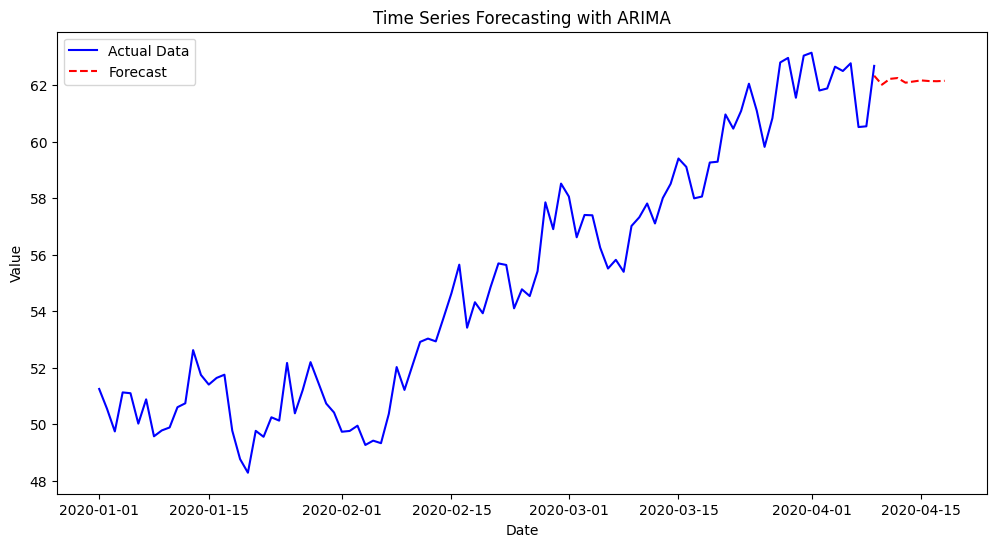

In [ ]:
print("Future Predictions:")
print(forecast_df)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual Data', color='blue')
plt.plot(forecast_df, label='Forecast', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting with ARIMA')
plt.legend()
plt.show()


Step 6: Anomaly Injection for Testing
python

In [ ]:
np.random.seed(42)
data = pd.read_csv('time_series_data.csv')
data.loc[data.index[-4:], 'Value'] = [10, 120, 5, 130]  # Inject anomalies properly


Step 7: Training the Isolation Forest Model for Anomaly Detection

In [ ]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(data[['Value']])


Step 8: Identifying and Printing Anomalies
python

In [ ]:
anomalies = data[data['Anomaly'] == -1]
print("Detected Anomalies:")
print(anomalies)


Detected Anomalies:
          Date       Value  Anomaly
19  2020-01-20   48.282801       -1
96  2020-04-06   10.000000       -1
97  2020-04-07  120.000000       -1
98  2020-04-08    5.000000       -1
99  2020-04-09  130.000000       -1


Step 9: Plotting Anomalies

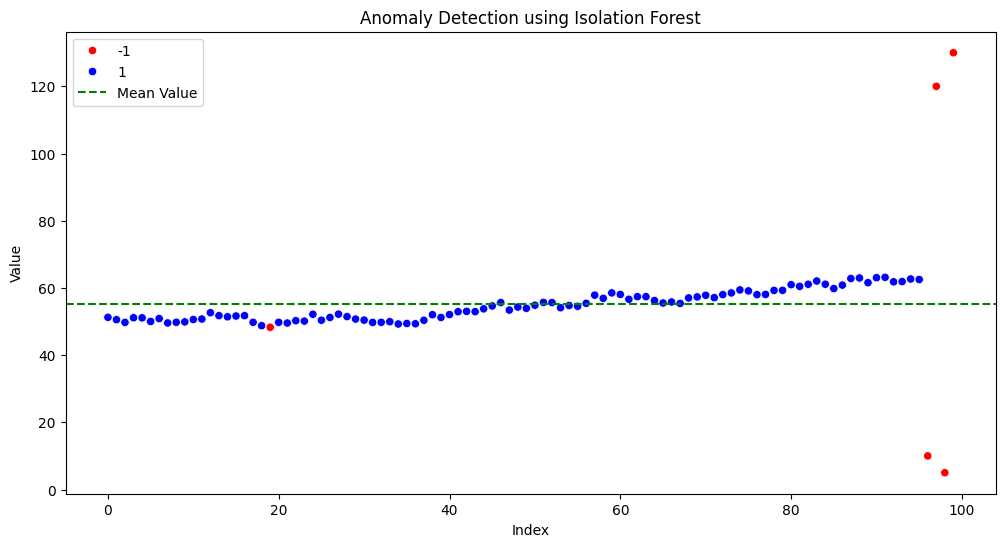

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data.index, y=data['Value'], hue=data['Anomaly'], palette={1: 'blue', -1: 'red'})
plt.axhline(y=np.mean(data['Value']), color='green', linestyle='dashed', label='Mean Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()


** This project involves two key tasks:
1. Time Series Forecasting using the ARIMA(AutoRegressive Integrated
   Moving Average.) model to predict future
   values based on past data.
2. Anomaly Detection using Isolation Forest to identify unusual     
   patterns or outliers in the dataset
** "Why is this useful?"
3. Time series forecasting helps in predicting future trends in
   finance, sales, weather, and more.
2. Anomaly detection is useful in fraud detection, system monitoring,
   and identifying abnormal behavior in datasets.



